# Explore here

1)Planteamiento del problema y recopilación de datos

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [68]:
#Importa las librerias
import pandas as pd 

#Se carga informacion del archivo 
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

#Se lee la data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


2) Exploración y limpieza de datos

In [69]:
#Revision del nivel de datos 
data.shape

# se tiene 41188 filas y 21 columnas 

(41188, 21)

In [70]:
#Obtener informacion del tipo de datos 

data.info()

#No existen valores nulos , todos tienen el mismo numero de filas 41188
#Datos categoricos: job,  marital, education, default, housing, loan, contact , month, day_of_week, poutcome, y
#Datos numericos :age, duration, campaign, pdays , previous, emp.var.rate, cons.price.idx , cons.conf.idx, euribor3m ,  nr.employed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [71]:
# Revisar si existe duplicados y si es asi los elimina 

data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
#Revisamos la cantidad de datos que quedaron despues de la limpieza 
data.shape

(41176, 21)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [74]:
#Verificar si hay data NaN 

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Eliminar información irrelevante

In [75]:
#se imprime elementos del dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [76]:
#Teniendo los siguientes datos: 
#   Datos categoricos: job,  marital, education, default, housing, loan, contact , month, day_of_week, poutcome, y
#   Datos numericos :age, duration, campaign, pdays , previous, emp.var.rate, cons.price.idx , cons.conf.idx, euribor3m ,  nr.employed

#Nos quedamos con: 
#   Datos categoricos: job,  marital, education, default, housing, loan , month, poutcome, y
#   Datos numericos :age, campaign , pdays,  previous, emp.var.rate, euribor3m , cons.conf.idx

data.drop(['duration', 'cons.price.idx', 'nr.employed', 'contact', 'day_of_week'], axis = 1, inplace = True)
data.head()



,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,may,1,999,0,nonexistent,1.1,-36.4,4.857,no


3) Análisis de variables univariante

/tmp/ipykernel_1153/718144262.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_1153/718144262.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
/tmp/ipykernel_1153/718144262.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)


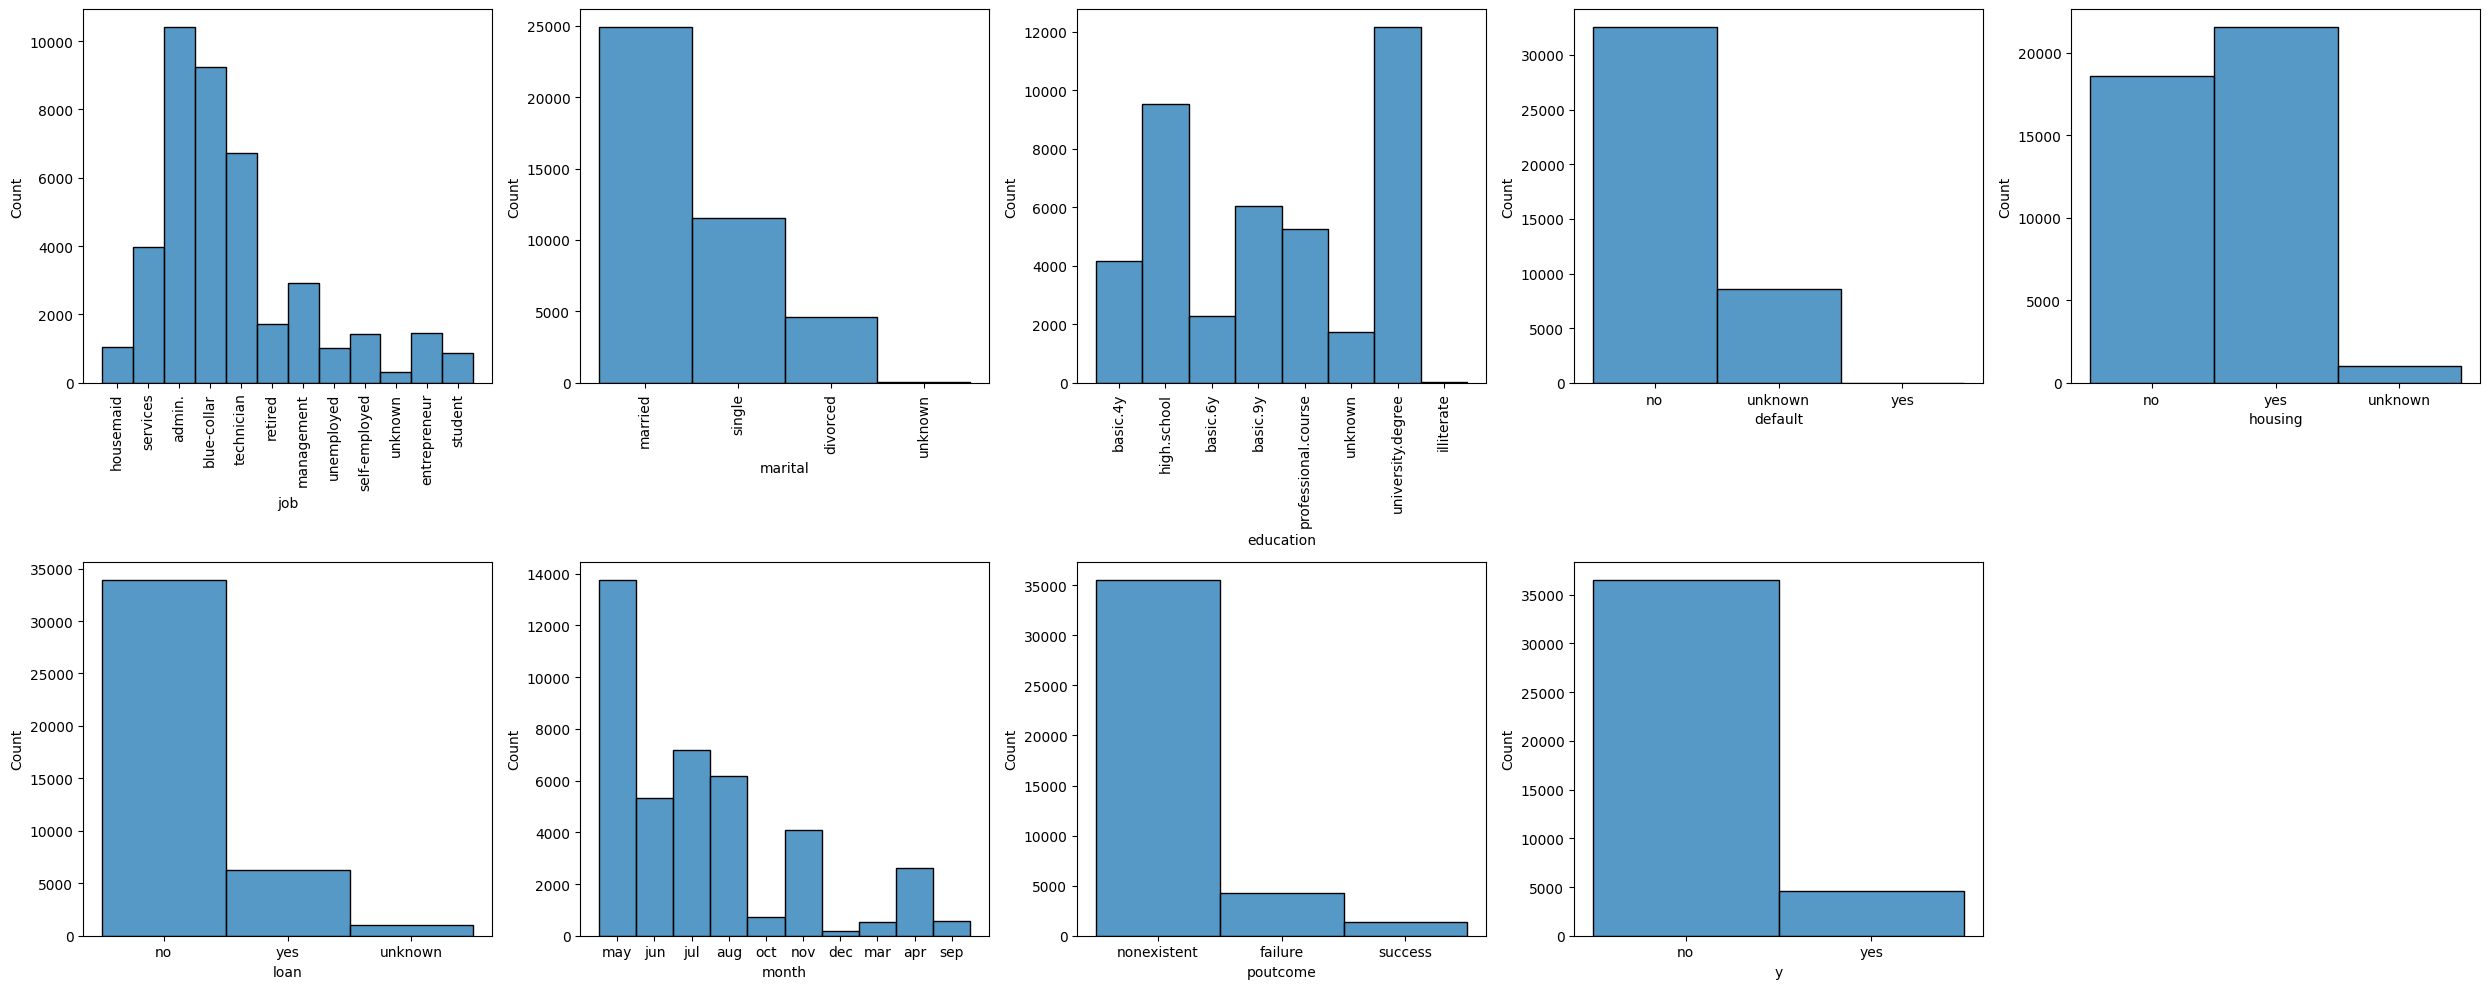

In [77]:
#Análisis sobre variables categóricas

#Se importan las librerias para graficar
import matplotlib.pyplot as plt 
import seaborn as sns

#   Datos categoricos: job,  marital, education, default, housing, loan , month, poutcome, y


fig, axis = plt.subplots(2, 5, figsize = (25, 10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "job")
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)

sns.histplot(ax = axis[0, 1], data = data, x = "marital")
axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)

sns.histplot(ax = axis[0, 2], data = data, x = "education")
axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)

sns.histplot(ax = axis[0, 3], data = data, x = "default")
sns.histplot(ax = axis[0, 4], data = data, x = "housing")
sns.histplot(ax = axis[1, 0], data = data, x = "loan")
sns.histplot(ax = axis[1, 1], data = data, x = "month")
sns.histplot(ax = axis[1, 2], data = data, x = "poutcome")
sns.histplot(ax = axis[1, 3], data = data, x = "y")
# Ocultar el último cuadrante vacío
axis[1, 4].axis('off')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#Observamos 
# Dentro de los trabajos mas mencionados estan : Admnin, blue-collar , tecnhnician y services 
# La mayoria de las personas registradas estan casadas y ademas con un titulo universitario,  high.school	, basic.9y o profesional.course 
# Gran cantidad de las personas no tienen un credito y existe una parte que desconocemos. si embargo si tiene una parte mayor un prestamo de vivienda , pero no uno personal 
# La mayoria de los clientes se les contacto en mayo 
# Si revisamos la campaña anterior , podemos garantizar que la mayoria no esta registrada o fallo para contratar un deposito a largo plazo 


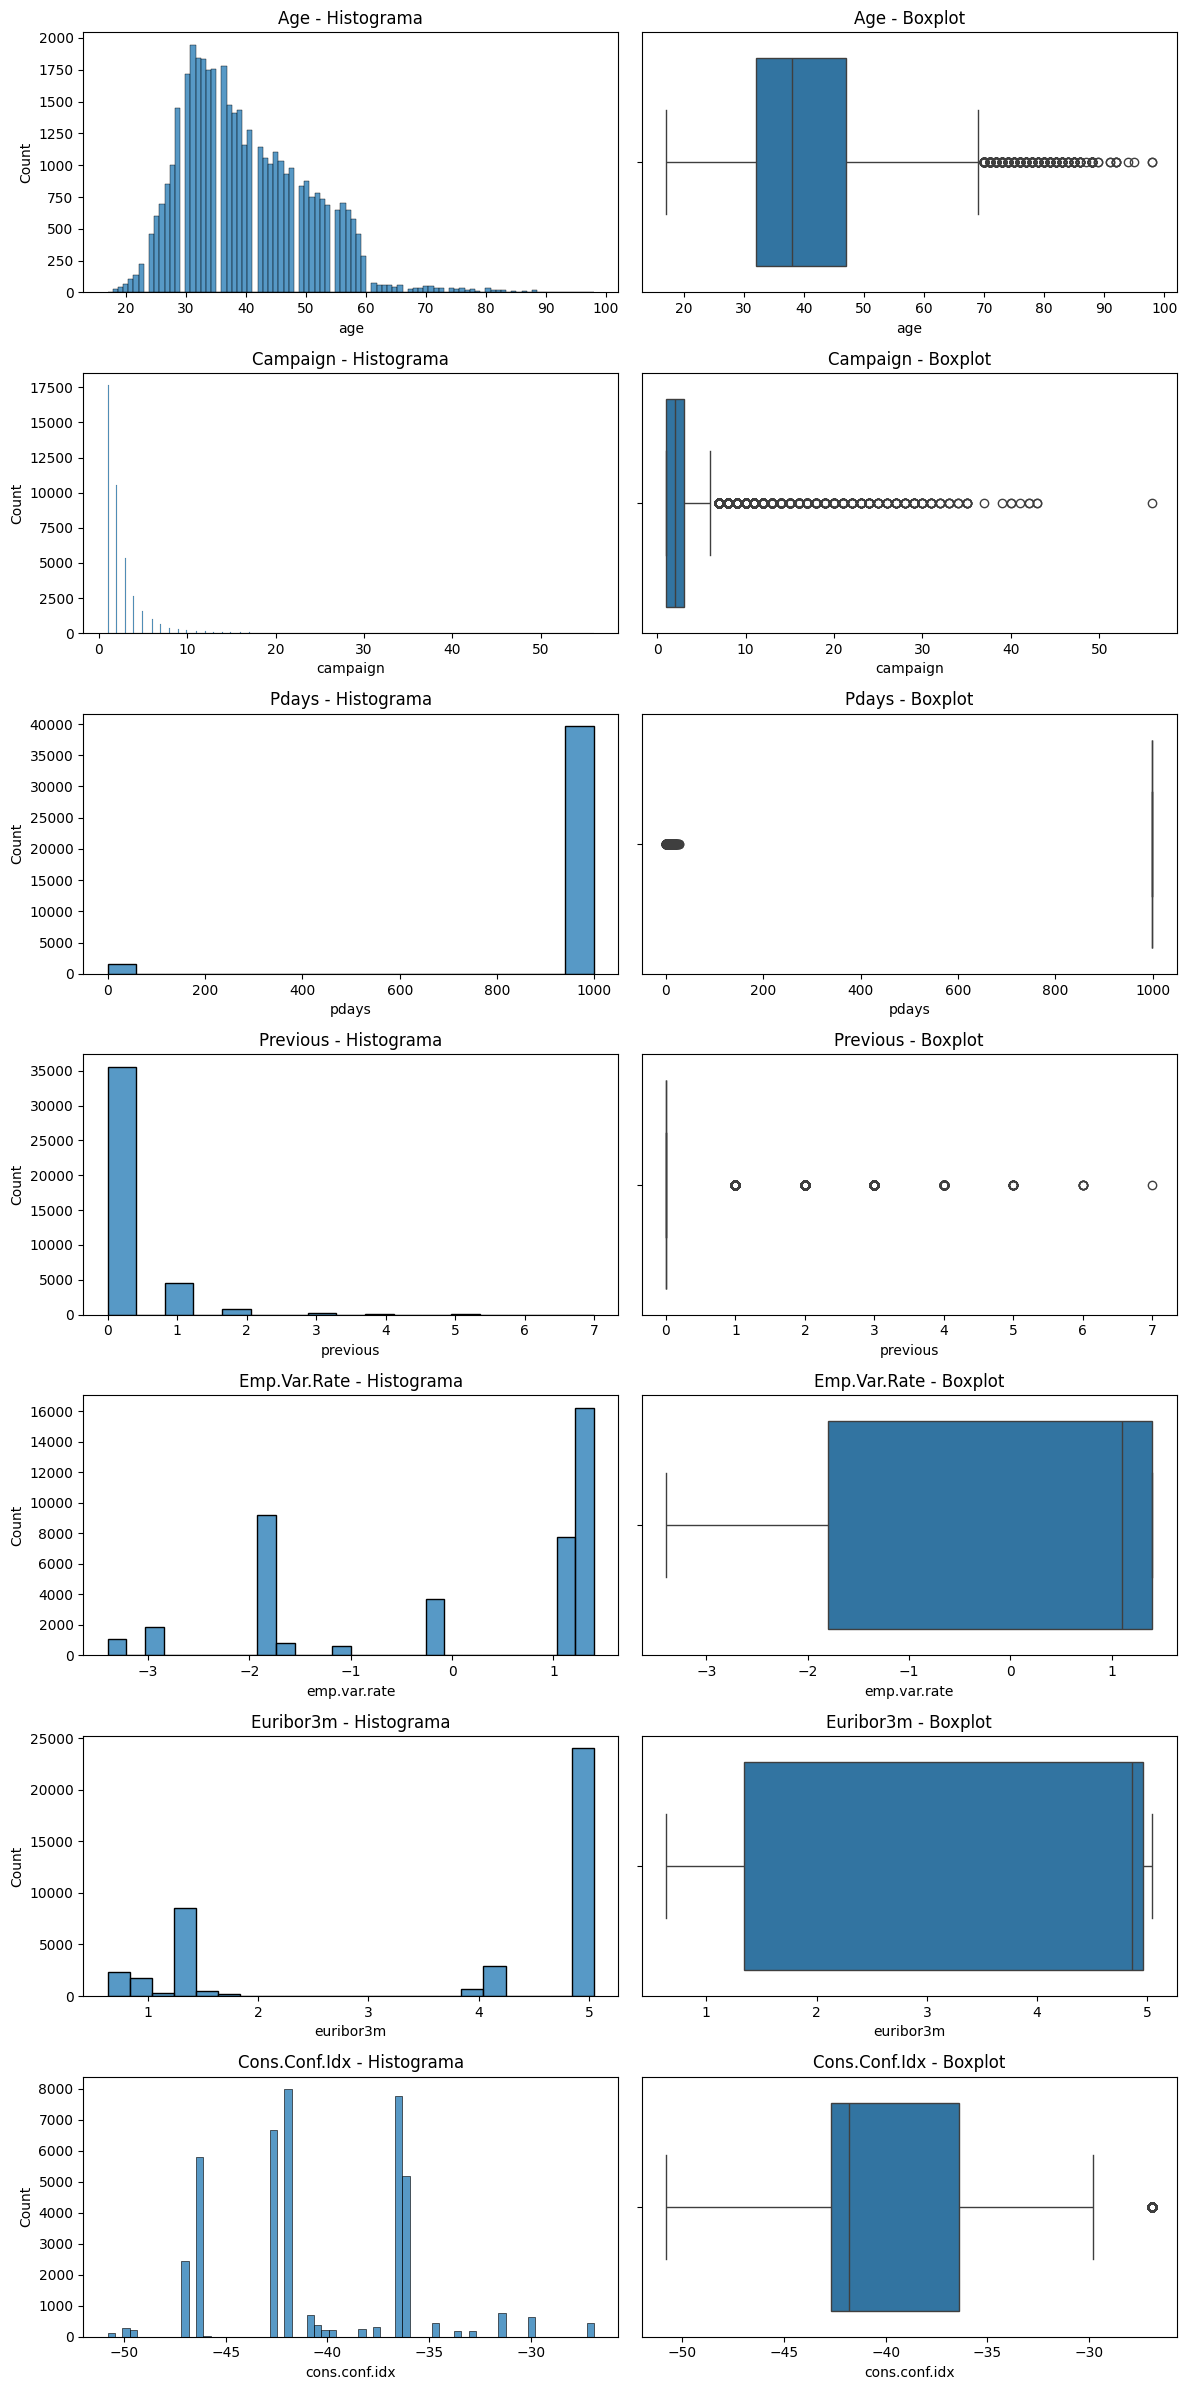

In [78]:
# Análisis sobre variables numéricas
# Datos numericos: age, campaign, pdays, previous, emp.var.rate, euribor3m, cons.conf.idx


# Crear subplots con 7 variables: 4 filas y 2 columnas (histograma y boxplot por cada variable)
fig, axis = plt.subplots(7, 2, figsize=(12, 24))

# Primera fila: age
sns.histplot(ax=axis[0, 0], data=data, x="age")
axis[0, 0].set_title("Age - Histograma")
sns.boxplot(ax=axis[0, 1], data=data, x="age")
axis[0, 1].set_title("Age - Boxplot")

# Segunda fila: campaign
sns.histplot(ax=axis[1, 0], data=data, x="campaign")
axis[1, 0].set_title("Campaign - Histograma")
sns.boxplot(ax=axis[1, 1], data=data, x="campaign")
axis[1, 1].set_title("Campaign - Boxplot")

# Tercera fila: pdays
sns.histplot(ax=axis[2, 0], data=data, x="pdays")
axis[2, 0].set_title("Pdays - Histograma")
sns.boxplot(ax=axis[2, 1], data=data, x="pdays")
axis[2, 1].set_title("Pdays - Boxplot")

# Cuarta fila: previous
sns.histplot(ax=axis[3, 0], data=data, x="previous")
axis[3, 0].set_title("Previous - Histograma")
sns.boxplot(ax=axis[3, 1], data=data, x="previous")
axis[3, 1].set_title("Previous - Boxplot")

# Quinta fila: emp.var.rate
sns.histplot(ax=axis[4, 0], data=data, x="emp.var.rate")
axis[4, 0].set_title("Emp.Var.Rate - Histograma")
sns.boxplot(ax=axis[4, 1], data=data, x="emp.var.rate")
axis[4, 1].set_title("Emp.Var.Rate - Boxplot")

# Sexta fila: euribor3m
sns.histplot(ax=axis[5, 0], data=data, x="euribor3m")
axis[5, 0].set_title("Euribor3m - Histograma")
sns.boxplot(ax=axis[5, 1], data=data, x="euribor3m")
axis[5, 1].set_title("Euribor3m - Boxplot")

# Séptima fila: cons.conf.idx
sns.histplot(ax=axis[6, 0], data=data, x="cons.conf.idx")
axis[6, 0].set_title("Cons.Conf.Idx - Histograma")
sns.boxplot(ax=axis[6, 1], data=data, x="cons.conf.idx")
axis[6, 1].set_title("Cons.Conf.Idx - Boxplot")

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#Observamos: 
# Las personas registradas ronda desde los 32 a 48 años en su mayoria. Presenta los datos con una ligera distribucion normal , sin embargo tenemos datos dispersos
# Por lo menos una vez se ha contadado al cliente en esta campaña . Mientras que en la campaña anterior , gran parte no fue contactada 
# la cantidad de veces que fueron contactados presenta muchos datos disperos , siendo atípicos que están lejos de la distribución estándar y que sus distribuciones son asimétricos. al igual que Previous 
# El indicador de confianza tiene datos erroneos que no nos ayudaran mas adelante (en negativo)




4. Análisis de variables multivariadas

/tmp/ipykernel_1153/127517869.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_1153/127517869.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,2].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)


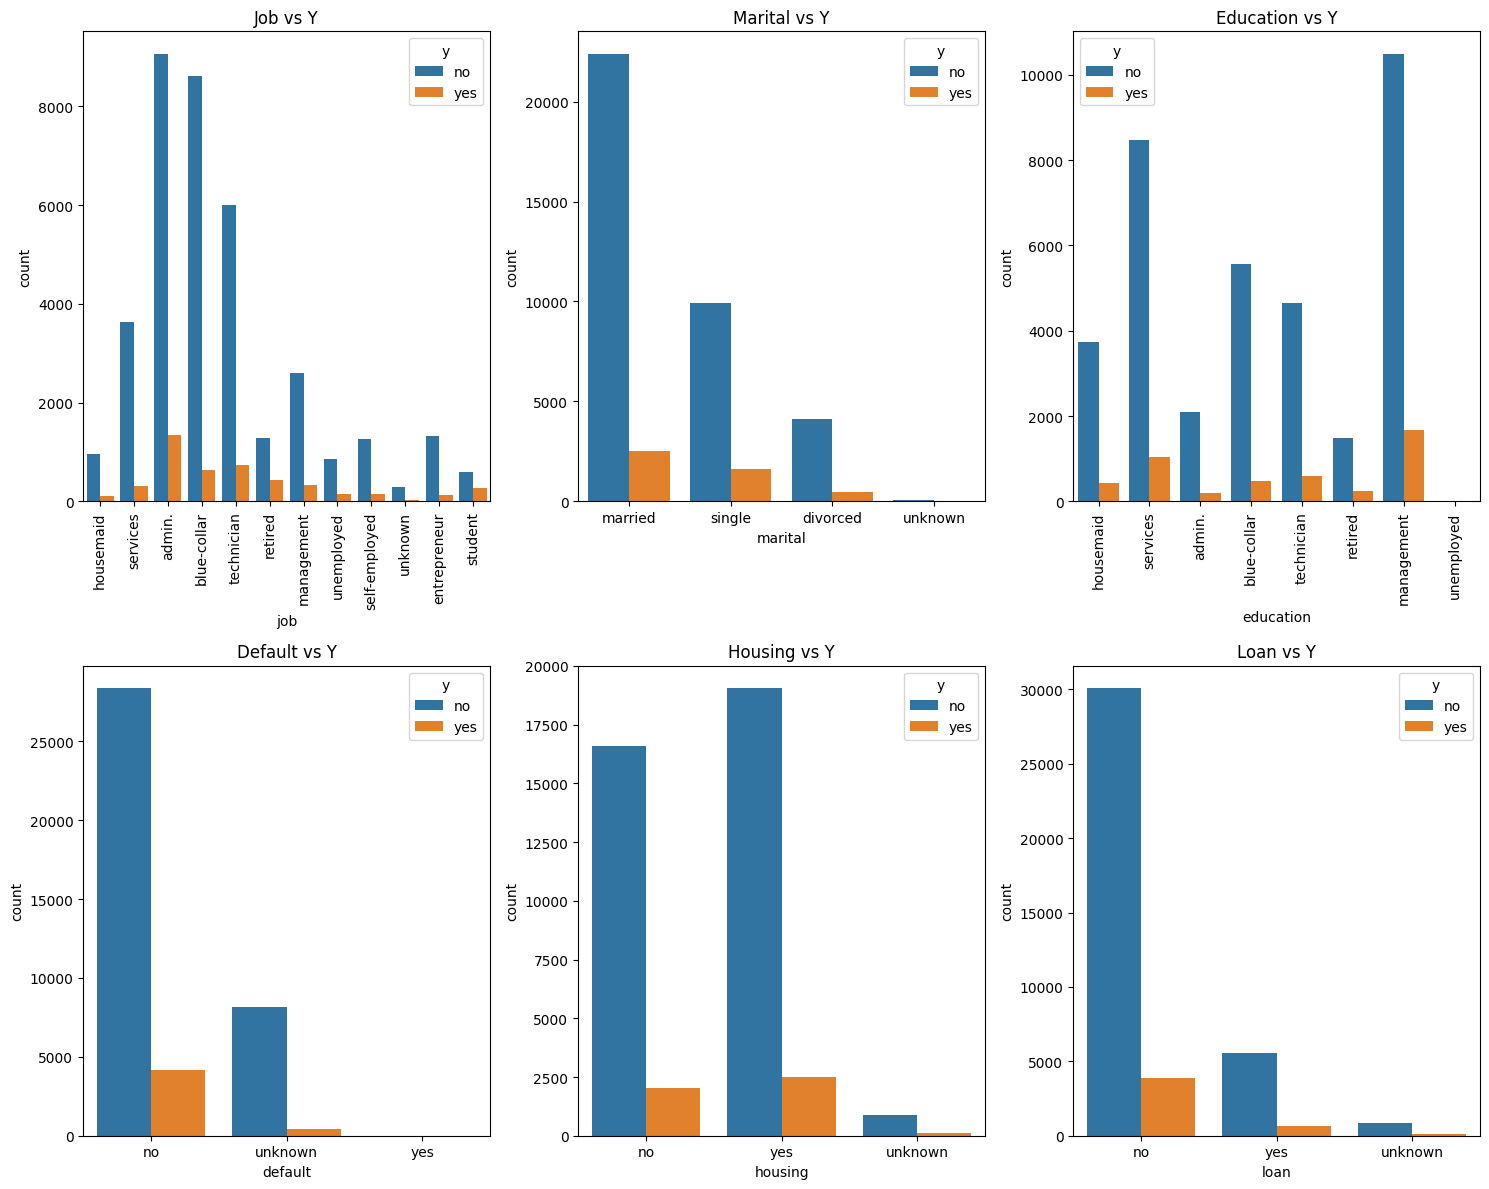

In [79]:
# Análisis categórico-categórico
# Datos categoricos: job, marital, education, default, housing, loan, y

# Crear subplots con 3 filas y 3 columnas
fig, axis = plt.subplots(2, 3, figsize=(15, 12))

# Primera fila
sns.countplot(ax=axis[0, 0], data=data, x="job", hue="y")
axis[0, 0].set_title("Job vs Y")
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)


sns.countplot(ax=axis[0, 1], data=data, x="marital", hue="y")
axis[0, 1].set_title("Marital vs Y")

sns.countplot(ax=axis[0, 2], data=data, x="education", hue="y")
axis[0, 2].set_title("Education vs Y")
axis[0,2].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)


# Segunda fila
sns.countplot(ax=axis[1, 0], data=data, x="default", hue="y")
axis[1, 0].set_title("Default vs Y")

sns.countplot(ax=axis[1, 1], data=data, x="housing", hue="y")
axis[1, 1].set_title("Housing vs Y")

sns.countplot(ax=axis[1, 2], data=data, x="loan", hue="y")
axis[1, 2].set_title("Loan vs Y")


# Ajustar el layout para que los gráficos no se solapen
plt.tight_layout()

# Mostrar gráficos
plt.show()

#Observamos:
# La mayoria de las personas registradas que no tienen un credito, se visualizan a que  harian un deposito a largo plazo . 
# Por otra parte, se visualiza una respuesta un poco positiva en los trabajos de Admin y technician. Al igual que las personas que estan casadas 
# Las personas que tienen un credito personal, se visualiza que tienen menos tendencia a realizar un deposito a largo plazo 

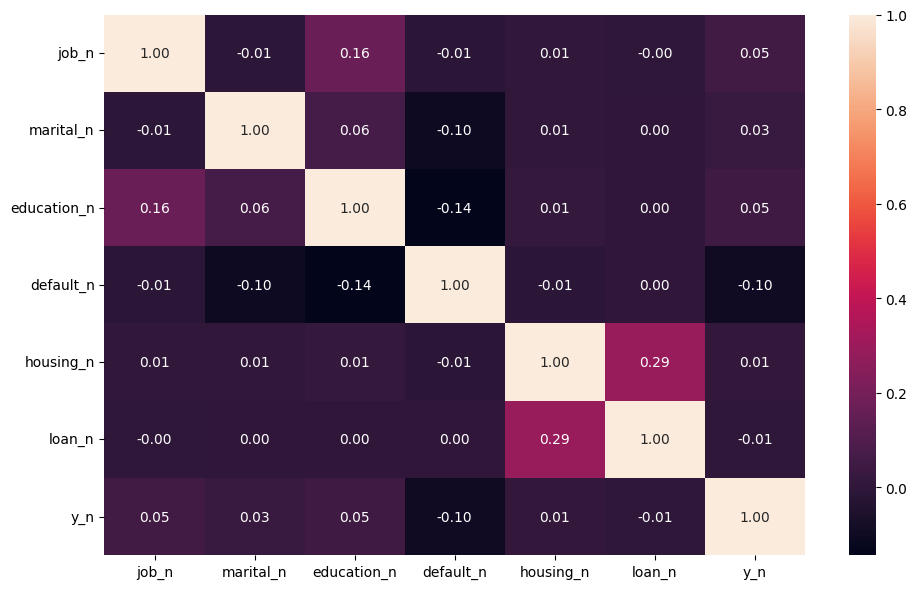

In [80]:
# Análisis de correlaciones 
# Datos categoricos: job, marital, education, default, housing, loan, y

data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["y_n"] = pd.factorize(data["y"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# Se observa: 
# Existe una relacion entre los que tienen un credito de vivienda y uno personal (0.29) . Al igual que con el tipo de eduacion y el trabajo de un 0.16
# Por otra parte hay una relacion negativa fuerte, en los que tienen un credito y el tipo marital (-0.14)

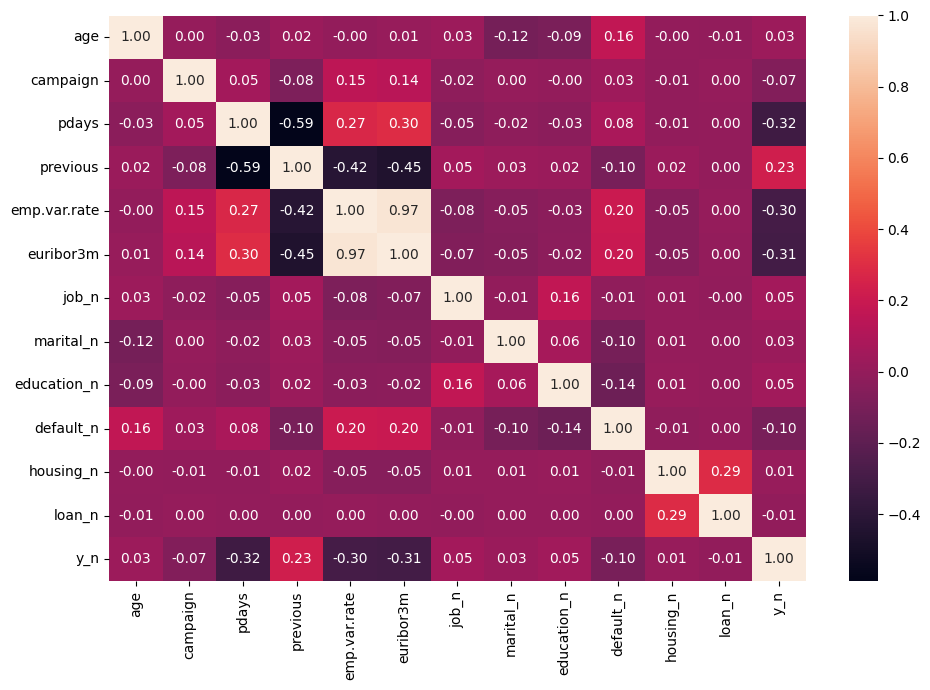

In [81]:
#Análisis numérico-categórico
# Datos numericos: age, campaign, pdays, previous, emp.var.rate, euribor3m, cons.conf.idx
# Datos categoricos: job, marital, education, default, housing, loan, y

fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data[["age", "campaign", "pdays", "previous", "emp.var.rate", "euribor3m", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# Se observa : 
# como vimos en el grafico anterior hay una relacion entre los que tienen un credito de vivienda y uno personal (0.29)
# Hay una relacion negativa con previous y los dias de cantacto de un -0.59
# Hay una relacion de las personas registradas con creditos y la variacion de empleo de un 0.20 al igual que la edad de un 0.16 



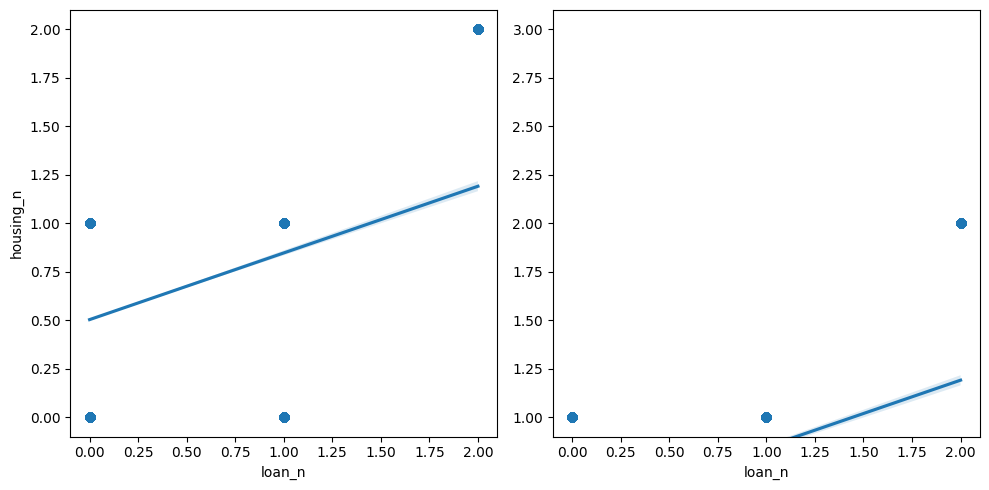

In [82]:
# relacion entre los que tienen un credito de vivienda y uno personal (0.29)
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data, x = "loan_n", y = "housing_n")
sns.regplot(ax = axis[1], data = data, x = "loan_n", y = "housing_n").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()


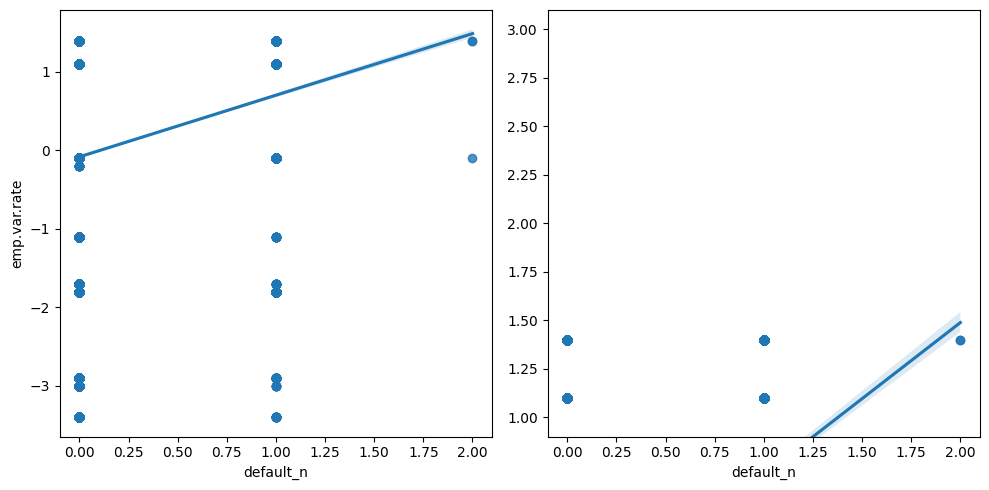

In [83]:
#relacion de las personas registradas con creditos y la variacion de empleo de un 0.20 al igual que la edad de un 0.16 

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data, x = "default_n", y = "emp.var.rate")
sns.regplot(ax = axis[1], data = data, x = "default_n", y = "emp.var.rate").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()


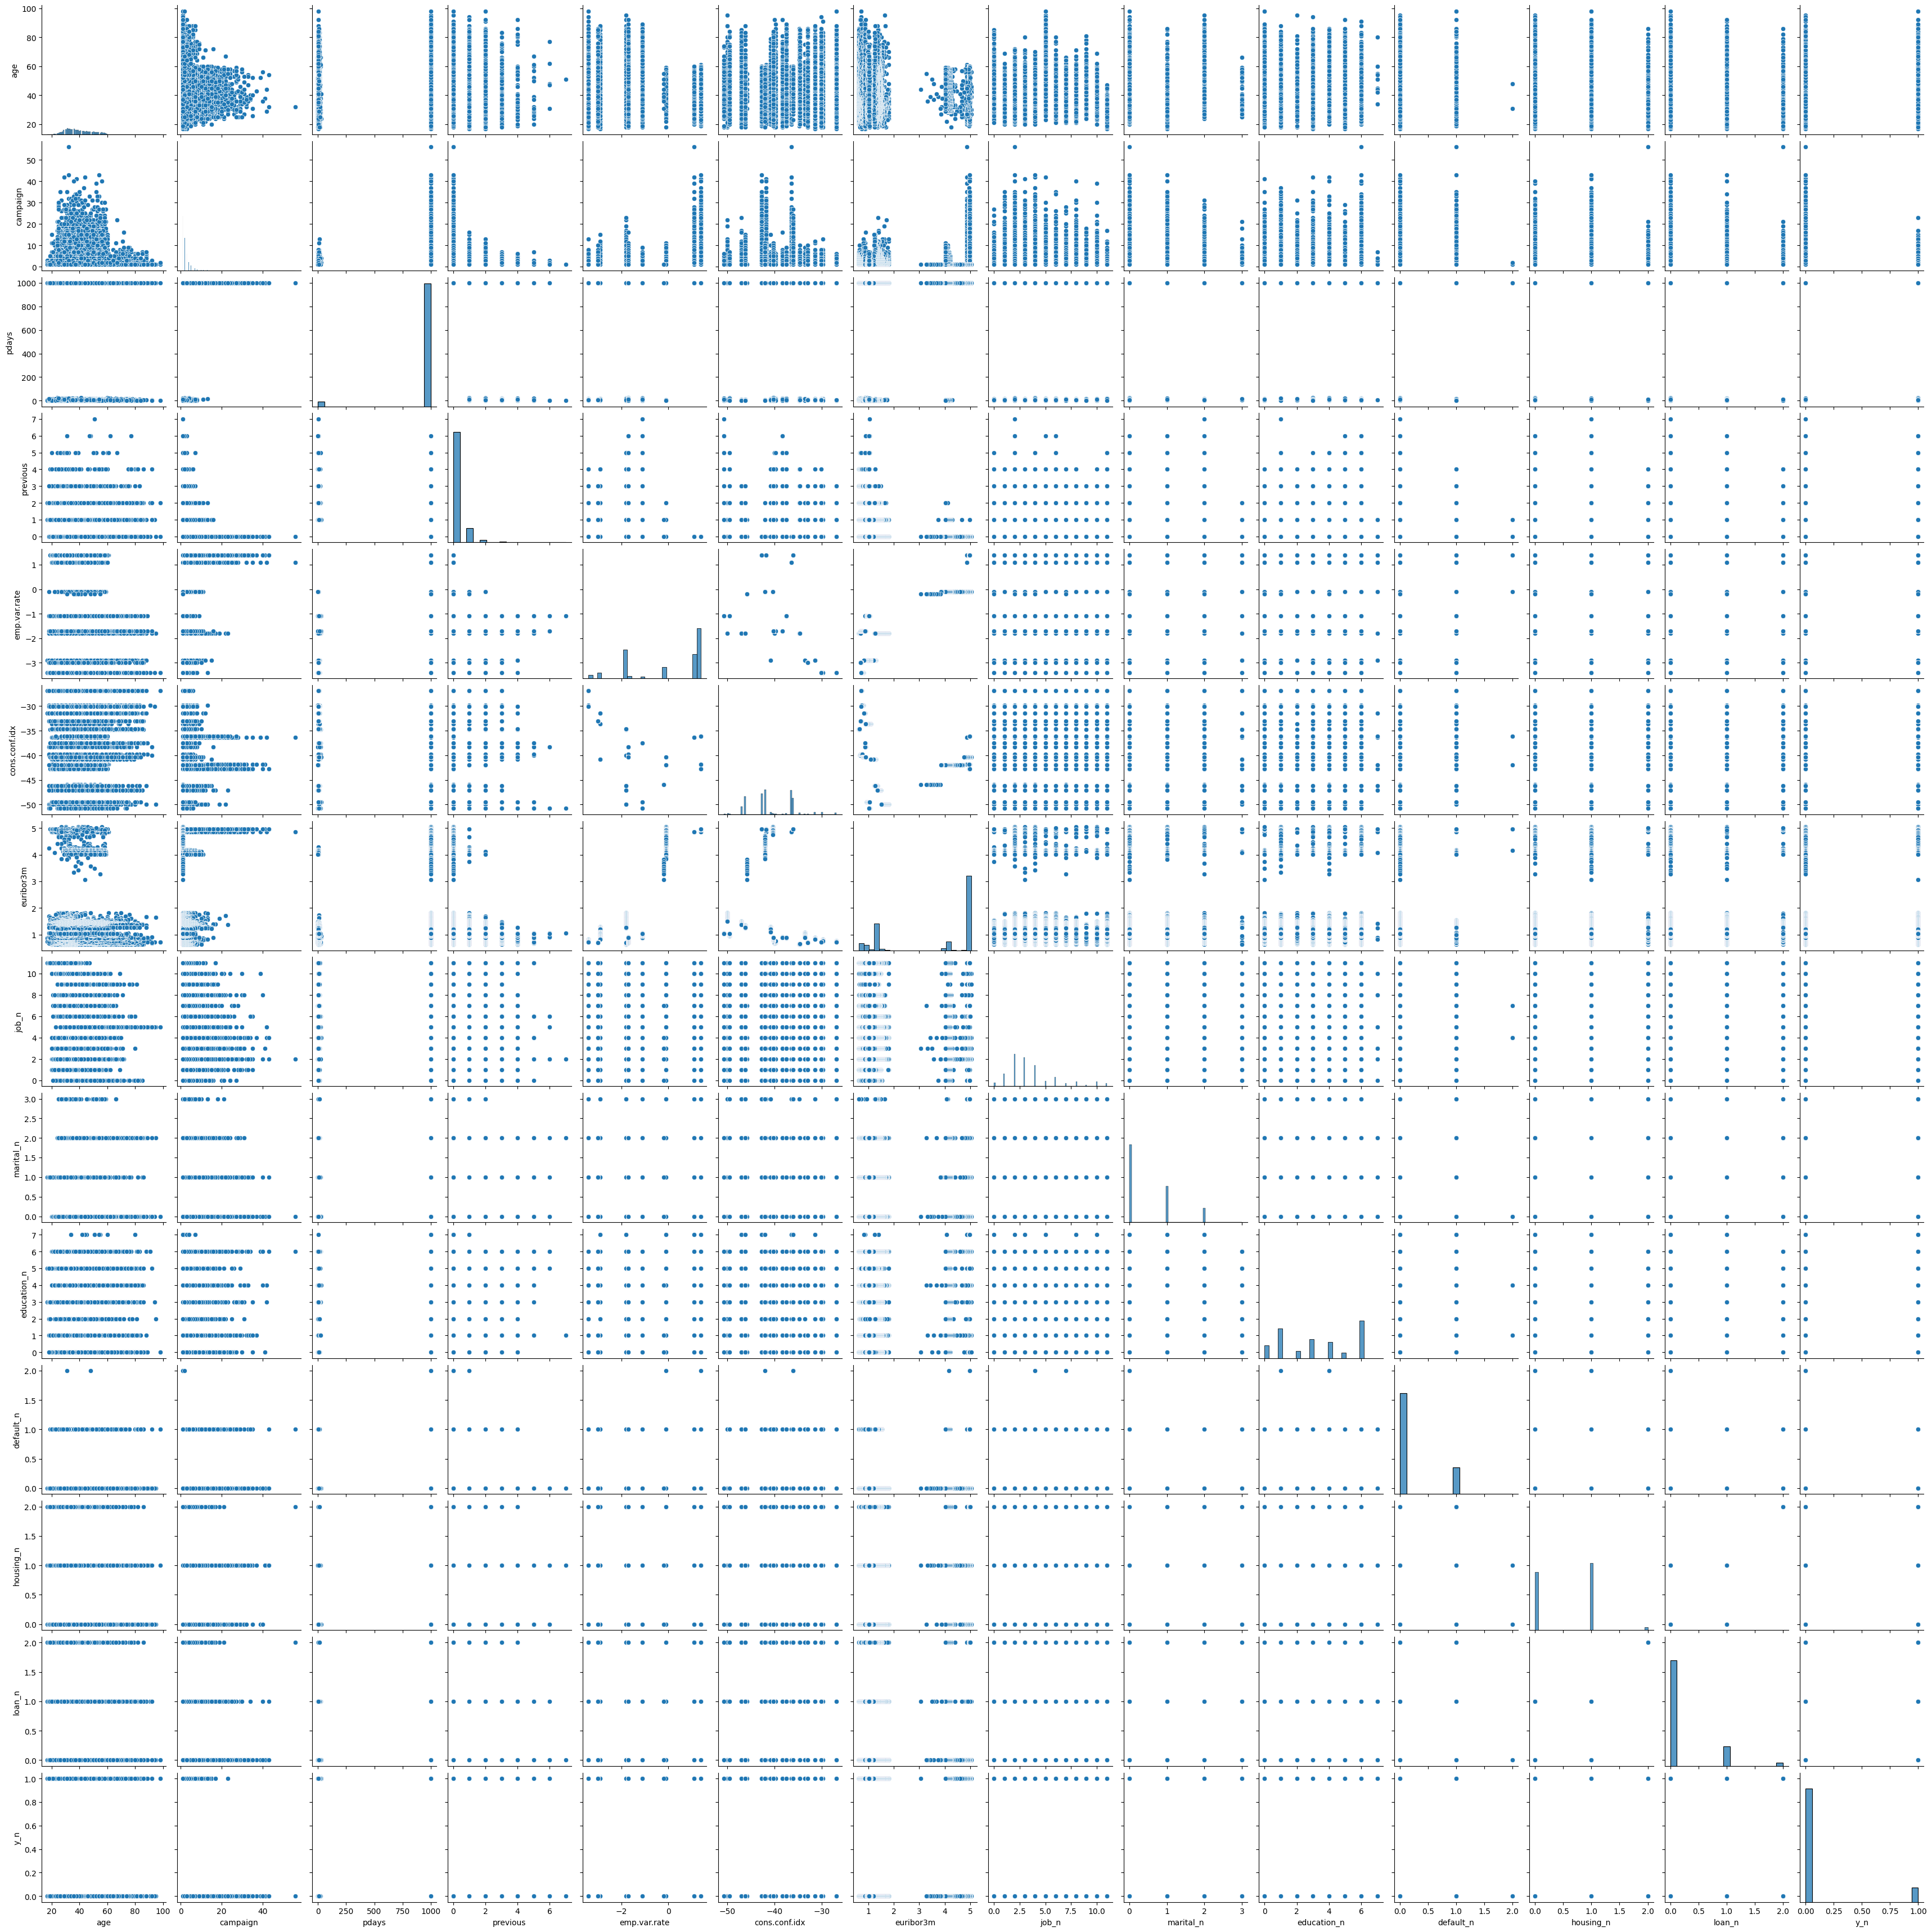

In [84]:
#Analisis de todos los datos 

sns.pairplot(data = data)

In [85]:
data.drop(['euribor3m', 'cons.conf.idx', 'previous'], axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,housing,loan,month,campaign,pdays,poutcome,emp.var.rate,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,may,1,999,nonexistent,1.1,no,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,may,1,999,nonexistent,1.1,no,1,0,1,1,0,0,0
2,37,services,married,high.school,no,yes,no,may,1,999,nonexistent,1.1,no,1,0,1,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,may,1,999,nonexistent,1.1,no,2,0,2,0,0,0,0
4,56,services,married,high.school,no,no,yes,may,1,999,nonexistent,1.1,no,1,0,1,0,0,1,0


5. Ingeniería de características

In [86]:
data.describe()
# Vemos los valores maximos y minimos , nuestros cuartiles (Q2 la mediana) , la media y desviacion estandar 

,age,campaign,pdays,emp.var.rate,job_n,marital_n,education_n,default_n,housing_n,loan_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.081922,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.112663
std,10.42068,2.770318,186.937102,1.570883,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.316184
min,17.00000,1.000000,0.000000,-3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,-1.800000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,1.100000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,1.400000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,1.400000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000


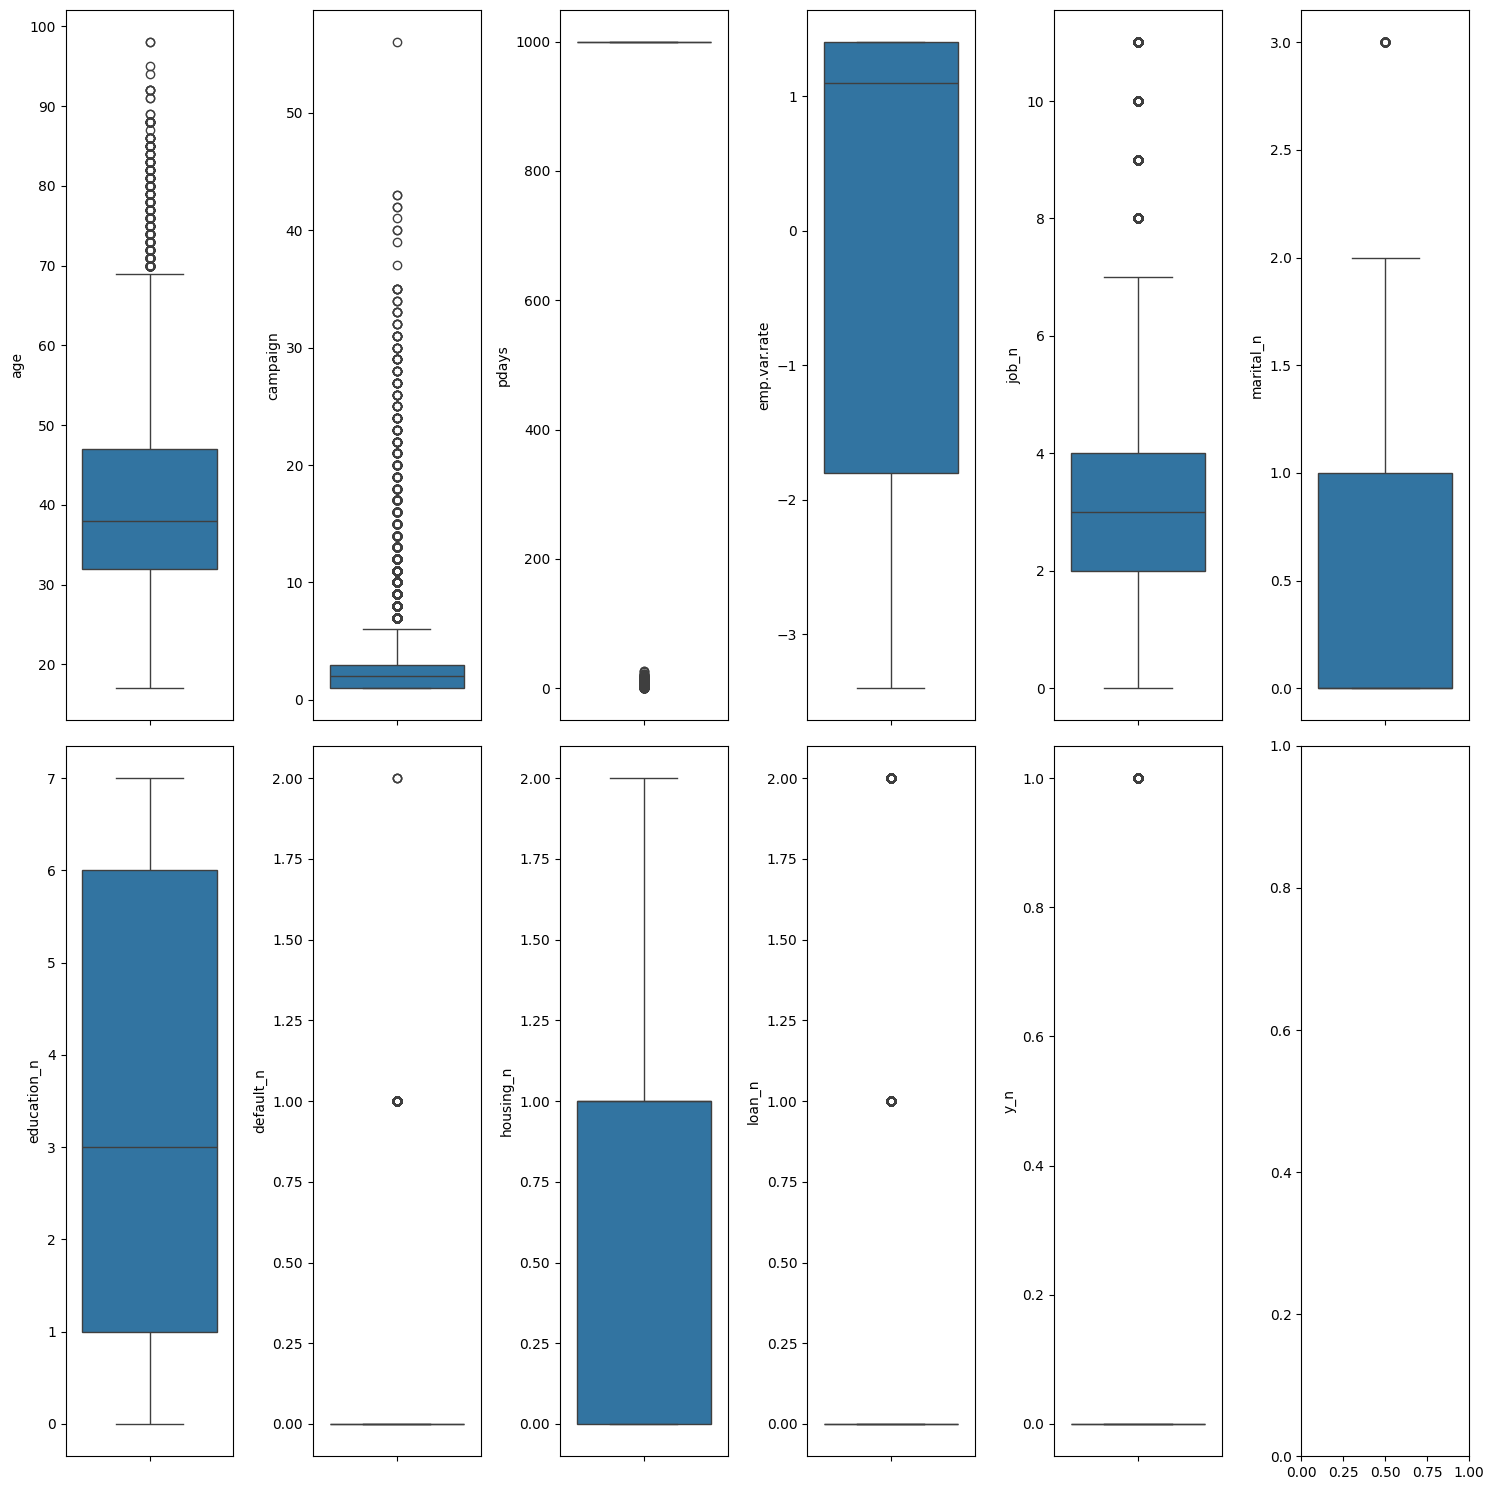

In [87]:
# Datos numericos: age, campaign, pdays, previous, emp.var.rate
# Datos categoricos: job, marital, education, default, housing, loan, y
fig, axes = plt.subplots(2, 6, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "age")
sns.boxplot(ax = axes[0, 1], data = data, y = "campaign")
sns.boxplot(ax = axes[0, 2], data = data, y = "pdays")
sns.boxplot(ax = axes[0, 3], data = data, y = "emp.var.rate")
sns.boxplot(ax = axes[0, 4], data = data, y = "job_n")
sns.boxplot(ax = axes[0, 5], data = data, y = "marital_n")
sns.boxplot(ax = axes[1, 0], data = data, y = "education_n")
sns.boxplot(ax = axes[1, 1], data = data, y = "default_n")
sns.boxplot(ax = axes[1, 2], data = data, y = "housing_n")
sns.boxplot(ax = axes[1, 3], data = data, y = "loan_n")
sns.boxplot(ax = axes[1, 4], data = data, y = "y_n")

plt.tight_layout()

plt.show()

# Observamos que tiene varios outliers, los mas afectados el price, minimum_nights, number_of_reviews ycalculated_host_listings_count
# se pueden hacer 3 cosas Mantenerlos, eliminarlos o reemplazarlos 

Limpiamos los outliers numericos
Datos numericos: age, campaign, pdays, emp.var.rate

In [88]:
#Limpiamos los outliers de age
#Primero revisamos los datos de age (Q, media , sdt)

age_des = data["age"].describe()
age_des

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [89]:
# IQR 

age_iqr = age_des["75%"] - age_des["25%"]

upper_limit = age_des["75%"] + 1.5 * age_iqr
lower_limit = age_des["25%"] - 1.5 * age_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("age_iqr : ", age_iqr )

upper_limit :  69.5
lower_limit :  9.5
age_iqr :  15.0


In [90]:
# Limpieza de outliers

data = data[(data["age"] <= 69.5) & (data["age"] >= 9.5)]

In [91]:
#Limpiamos los outliers de campaign
#Primero revisamos los datos de campaign (Q, media , sdt)

campaign_des = data["campaign"].describe()
campaign_des

count    40708.000000
mean         2.575071
std          2.779760
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [92]:
# IQR 

campaign_iqr = campaign_des["75%"] - campaign_des["25%"]

upper_limit = campaign_des["75%"] + 1.5 * campaign_iqr
lower_limit = campaign_des["25%"] - 1.5 * campaign_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("campaign_iqr : ", campaign_iqr )

upper_limit :  6.0
lower_limit :  -2.0
campaign_iqr :  2.0


In [93]:
# Limpieza de outliers

data = data[(data["campaign"] <= 6.0) & (data["campaign"] >= 0)]

In [94]:
#Limpiamos los outliers de pdays
#Primero revisamos los datos de pdays (Q, media , sdt)

pdays_des = data["pdays"].describe()
pdays_des

count    38316.000000
mean       962.667450
std        186.434606
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [95]:
# IQR 

pdays_iqr = pdays_des["75%"] - pdays_des["25%"]

upper_limit = pdays_des["75%"] + 1.5 * pdays_iqr
lower_limit = pdays_des["25%"] - 1.5 * pdays_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("pdays_iqr : ", pdays_iqr )

upper_limit :  999.0
lower_limit :  999.0
pdays_iqr :  0.0


In [96]:
# Limpieza de outliers

data = data[(data["pdays"] <= 999.0) & (data["pdays"] >= 999.0)]

In [97]:
#Limpiamos los outliers de emp.var.rate
#Primero revisamos los datos de  emp.var.rate(Q, media , sdt)

rate_des = data["emp.var.rate"].describe()
rate_des


count    36914.000000
mean         0.146573
std          1.528537
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [98]:
# IQR 

rate_iqr = rate_des["75%"] - rate_des["25%"]

upper_limit = rate_des["75%"] + 1.5 * rate_iqr
lower_limit = rate_des["25%"] - 1.5 * rate_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("rate_iqr : ", rate_iqr )

upper_limit :  6.200000000000001
lower_limit :  -6.6000000000000005
rate_iqr :  3.2


In [99]:
# Limpieza de outliers

data = data[(data["emp.var.rate"] <= 6.200000000000001) & (data["emp.var.rate"] >= 0)]

Limpiamos los outliers categoricos
Datos categoricos: job, marital, education, default, housing, loan, y

In [100]:
#Limpiamos los outliers de job
#Primero revisamos los datos de job (Q, media , sdt)

job_des = data["job_n"].describe()
job_des

count    22010.000000
mean         3.486006
std          2.273740
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: job_n, dtype: float64

In [101]:
# IQR 

job_iqr = job_des["75%"] - job_des["25%"]

upper_limit = job_des["75%"] + 1.5 * job_iqr
lower_limit = job_des["25%"] - 1.5 * job_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("job_iqr : ", job_iqr )

upper_limit :  7.0
lower_limit :  -1.0
job_iqr :  2.0


In [102]:
# Limpieza de outliers

data = data[(data["job_n"] <= 7.0) & (data["job_n"] >= 0)]

In [103]:
#Limpiamos los outliers de marital
#Primero revisamos los datos de marital (Q, media , sdt)

marital_des = data["marital_n"].describe()
marital_des

count    20169.000000
mean         0.484952
std          0.700048
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: marital_n, dtype: float64

In [104]:
# IQR 

marital_iqr = marital_des["75%"] - marital_des["25%"]

upper_limit = marital_des["75%"] + 1.5 * marital_iqr
lower_limit = marital_des["25%"] - 1.5 * marital_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("marital_iqr : ", marital_iqr )

upper_limit :  2.5
lower_limit :  -1.5
marital_iqr :  1.0


In [105]:
# Limpieza de outliers

data = data[(data["marital_n"] <= 2.5) & (data["marital_n"] >= 0)]

In [106]:
#Limpiamos los outliers de education
#Primero revisamos los datos de education (Q, media , sdt)

education_des = data["education_n"].describe()
education_des

count    20147.000000
mean         3.127314
std          2.155137
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          7.000000
Name: education_n, dtype: float64

In [107]:
# IQR 

education_iqr = education_des["75%"] - education_des["25%"]

upper_limit = education_des["75%"] + 1.5 * education_iqr
lower_limit = education_des["25%"] - 1.5 * education_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("education_iqr : ", education_iqr )

upper_limit :  13.5
lower_limit :  -6.5
education_iqr :  5.0


In [108]:
# Limpieza de outliers

data = data[(data["education_n"] <= 13.5) & (data["education_n"] >= 0)]

In [109]:
#Limpiamos los outliers de default
#Primero revisamos los datos de default (Q, media , sdt)

default_des = data["default_n"].describe()
default_des

count    20147.000000
mean         0.278950
std          0.448715
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: default_n, dtype: float64

In [110]:
# IQR 

default_iqr = default_des["75%"] - default_des["25%"]

upper_limit = default_des["75%"] + 1.5 * default_iqr
lower_limit = default_des["25%"] - 1.5 * default_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("default_iqr : ", default_iqr )

upper_limit :  2.5
lower_limit :  -1.5
default_iqr :  1.0


In [111]:
# Limpieza de outliers

data = data[(data["default_n"] <= 2.5) & (data["default_n"] >= 0)]

In [112]:
#Limpiamos los outliers de housing
#Primero revisamos los datos de housing (Q, media , sdt)

housing_des = data["housing_n"].describe()
housing_des


count    20147.000000
mean         0.544845
std          0.546290
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: housing_n, dtype: float64

In [113]:
# IQR 

housing_iqr = housing_des["75%"] - housing_des["25%"]

upper_limit = housing_des["75%"] + 1.5 * housing_iqr
lower_limit = housing_des["25%"] - 1.5 * housing_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("housing_iqr : ", housing_iqr )

upper_limit :  2.5
lower_limit :  -1.5
housing_iqr :  1.0


In [114]:
# Limpieza de outliers

data = data[(data["housing_n"] <= 2.5) & (data["housing_n"] >= 0)]

In [115]:
#Limpiamos los outliers de loan
#Primero revisamos los datos de loan (Q, media , sdt)

loan_des = data["loan_n"].describe()
loan_des

count    20147.000000
mean         0.202859
std          0.460594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: loan_n, dtype: float64

In [116]:
# IQR 

loan_iqr = loan_des["75%"] - loan_des["25%"]

upper_limit = loan_des["75%"] + 1.5 * loan_iqr
lower_limit = loan_des["25%"] - 1.5 * loan_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("loan_iqr : ", loan_iqr )

upper_limit :  0.0
lower_limit :  0.0
loan_iqr :  0.0


In [117]:
# Limpieza de outliers

data = data[(data["loan_n"] <= 1)]

In [118]:
#Limpiamos los outliers de y
#Primero revisamos los datos de y (Q, media , sdt)

y_des = data["y_n"].describe()
y_des

count    19639.000000
mean         0.046591
std          0.210766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_n, dtype: float64

In [119]:
# IQR 

y_iqr = y_des["75%"] - y_des["25%"]

upper_limit = y_des["75%"] + 1.5 * y_iqr
lower_limit = y_des["25%"] - 1.5 * y_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("y_iqr : ", y_iqr )

upper_limit :  0.0
lower_limit :  0.0
y_iqr :  0.0


In [120]:
# Limpieza de outliers

data = data[(data["y_n"] <= 1)]

Análisis de valor faltante

In [121]:
data.isnull().sum().sort_values(ascending = False)

# Refleja que no tiene datos nulos 

age             0
job             0
marital         0
education       0
default         0
housing         0
loan            0
month           0
campaign        0
pdays           0
poutcome        0
emp.var.rate    0
y               0
job_n           0
marital_n       0
education_n     0
default_n       0
housing_n       0
loan_n          0
y_n             0
dtype: int64

Escalado de funciones

In [122]:
# Se normaliza las variapbles para que tengan un rango estandar de [1, -1]
#Datos categoricos: job, marital, education, default, housing, loan, y
#Datos numericos: age, campaign, pdays, emp.var.rate



from sklearn.preprocessing import MinMaxScaler

variables =['age', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'campaign', 'pdays', 'emp.var.rate', 'y_n']
scaler = MinMaxScaler()

scal_features = scaler.fit_transform(data[variables])

df_scal = pd.DataFrame(scal_features, index = data.index, columns = variables)

df_scal.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,campaign,pdays,emp.var.rate,y_n
0,0.900,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.925,0.142857,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.425,0.142857,0.0,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.500,0.285714,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.900,0.142857,0.0,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [123]:
# Seleccion de variables relevantes para entrenar el modole 
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("y_n", axis = 1)
y = df_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

#Observamos que mediante la métrica estadística (Chi-cuadrado), se seleccionan las variables. El objetivo es medir la independencia entre cada característica y la variable objetivo. 

,default_n,housing_n,campaign,emp.var.rate
0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.6,1.0
2,0.5,1.0,0.2,0.0
3,0.0,0.0,0.8,0.0
4,0.0,1.0,0.0,1.0


In [124]:
#Se guardan los datos limpios

X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/train.csv", index = False)
X_test_sel.to_csv("../data/processed/test.csv", index = False)

# Modelo de regresión logística

In [125]:
#Se leen los datos de entrenamiento y los de test 
train_data = pd.read_csv("../data/processed/train.csv")
test_data = pd.read_csv("../data/processed/test.csv")

train_data.head()

,default_n,housing_n,campaign,emp.var.rate,y_n
0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,0.6,1.0,0.0
2,0.5,1.0,0.2,0.0,0.0
3,0.0,0.0,0.8,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0


In [126]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [127]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train) # se ajusta el modelo

LogisticRegression()

In [128]:
# Mis datos de prediccion para el modelo de test
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [129]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

#  fracción de predicciones que el modelo realizó correctamente. Tenemos un 95%

0.9536659877800407

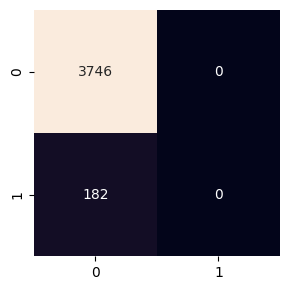

In [130]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

# Observamos :
#Verdaderos positivos (TP, True positive): Se corresponde con el número 3746 y son los casos en los que el modelo predijo positivo y la clase real también es positiva.
#Falsos positivos (FP, False positive): Se corresponde con el número 182 y son los casos en los que el modelo predijo positivo y la clase real es negativa.


In [138]:
#Se guarda el modelo
from pickle import dump

dump(model, open("../models/regression_logistica_42.sav", "wb"))